<a href="https://colab.research.google.com/github/latte05/ML_training/blob/master/ML_Training_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
in_file = "data2.csv"
out_file = "kion10y.csv"

with open(in_file, "rt", encoding="Shift-JIS") as fr:
  lines = fr.readlines()
  
lines = ["年,月,日,気温,品質,均質\n"] + lines[5:]
lines = map(lambda v: v.replace('/',','), lines)
result = "".join(lines).strip()

with open(out_file,"wt", encoding="utf-8") as fw:
  fw.write(result)
  print("saved")

FileNotFoundError: ignored

In [0]:
from urllib.request import urlretrieve
urlretrieve("https://raw.githubusercontent.com/kujirahand/mlearn-sample/master/tenki2006-2016/kion10y.csv", "kion10y-2.csv")
import pandas as pd

#pd.read_csv("kion10y.csv")
df = pd.read_csv("kion10y-2.csv")

In [10]:
md = {}
for i, row in df.iterrows():
  m, d, v = (int(row['月']), int(row['日']), float(row['気温']))
  key = str(m) + "/" + str(d)
  if not(key in md): md[key] = []
  md[key] += [v]
  
#avg per date
avs = {}
for key in md:
  v = avs[key] = sum(md[key]) / len(md[key])
  print("{0} : {1}".format(key,v))

1/1 : 6.0
1/2 : 6.545454545454546
1/3 : 6.145454545454546
1/4 : 6.1
1/5 : 6.4818181818181815
1/6 : 6.663636363636363
1/7 : 6.290909090909091
1/8 : 6.718181818181818
1/9 : 6.6000000000000005
1/10 : 6.0636363636363635
1/11 : 5.972727272727272
1/12 : 5.045454545454546
1/13 : 5.427272727272728
1/14 : 5.090909090909092
1/15 : 5.4363636363636365
1/16 : 5.654545454545454
1/17 : 5.627272727272726
1/18 : 5.045454545454546
1/19 : 6.0636363636363635
1/20 : 5.6909090909090905
1/21 : 5.6
1/22 : 5.5636363636363635
1/23 : 5.890909090909091
1/24 : 5.4818181818181815
1/25 : 6.0
1/26 : 6.027272727272727
1/27 : 6.363636363636363
1/28 : 6.5
1/29 : 6.281818181818181
1/30 : 6.763636363636365
1/31 : 6.754545454545453
2/1 : 6.309090909090909
2/2 : 6.663636363636363
2/3 : 6.363636363636363
2/4 : 5.800000000000001
2/5 : 5.790909090909091
2/6 : 5.318181818181818
2/7 : 6.1909090909090905
2/8 : 5.645454545454545
2/9 : 5.754545454545455
2/10 : 6.627272727272726
2/11 : 5.618181818181818
2/12 : 5.690909090909091
2/13

In [4]:
avs["11/3"]

15.48181818181818

年
2006     2
2007    11
2008     5
2010    21
2011     9
2012     8
2013    16
2014    12
2015     7
2016     1
Name: 年, dtype: int64


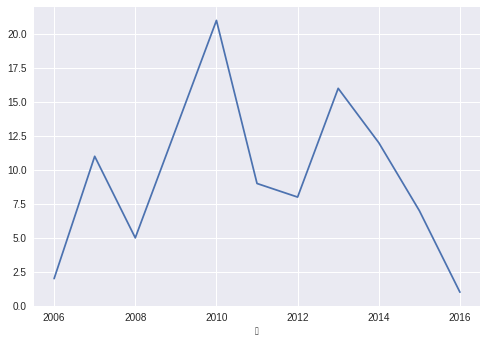

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

hotday_bool = (df["気温"] >30)
hotday = df[hotday_bool]
cnt = hotday.groupby(["年"])["年"].count()
print(cnt)
cnt.plot()
plt.show()

In [0]:
# Machine Learning
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("kion10y-2.csv", encoding="utf-8")

#train data split


